# Separate analysis of Terrestrial/Giant-type systems

- KDE analysis on the first consolidated data created in the `prep/dataprep.ipynb` notebook (separated by systems with giant planets (gt) and terrestrial planet-only systems (tr)). 
- Linear regression analysis of sigmag0, metallicity, mass efficiency

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fold='../prep/'

In [3]:
dn=pd.read_csv(fold+'proc_no_pert.csv',index_col=None)
dn["gia"]=dn.ngi>0
dl=pd.read_csv(fold+'proc_lo_pert.csv',index_col=None)
dl["gia"]=dl.ngi>0
dh=pd.read_csv(fold+'proc_hi_pert.csv',index_col=None)
dh["gia"]=dh.ngi>0

In [10]:
dn.head()

,Unnamed: 0,ident,com,nplanets,massbudget,massefficiency,sigmag0,md,rc,ms,metal,taugas,qest,ngi,mtr,apert,gia
0,0,3.0,1.081461,10.0,10770.309627,0.576981,90.793337,0.049286,29.539343,0.880114,0.328146,1.644711e+06,8.421395,4.0,12.004623,0.0,True
1,1,5.0,2.932894,12.0,17.882769,0.000488,102.431593,0.118280,38.977428,1.075269,-0.150160,1.014449e+06,5.464831,0.0,17.882769,0.0,False
2,2,6.0,0.110789,12.0,2422.342359,0.060559,75.740878,0.103391,47.343380,0.861595,0.021273,1.790533e+06,4.412694,1.0,29.771089,0.0,True
3,3,8.0,5.740174,9.0,8.166382,0.000163,62.737337,0.161499,58.158928,1.076658,-0.282408,6.017040e+06,4.704798,0.0,8.166382,0.0,False
4,4,13.0,0.172211,13.0,2905.457535,0.051273,178.830700,0.205096,36.672222,1.206445,-0.174039,3.956708e+06,3.998513,1.0,14.220447,0.0,True


In [8]:
dnt=dn[~dn["gia"]]
dlt=dl[~dl["gia"]]
dht=dh[~dh["gia"]]
dng=dn[dn["gia"]]
dlg=dl[dl["gia"]]
dhg=dh[dh["gia"]]

In [3]:
dnpg=pd.read_csv(fold+'gt_no_pert.csv')
dlpg=pd.read_csv(fold+'gt_lo_pert.csv')
dhpg=pd.read_csv(fold+'gt_hi_pert.csv')

dnpt=pd.read_csv(fold+'tr_no_pert.csv')
dlpt=pd.read_csv(fold+'tr_lo_pert.csv')
dhpt=pd.read_csv(fold+'tr_hi_pert.csv')

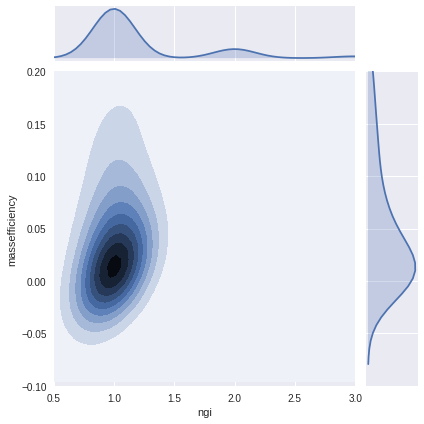

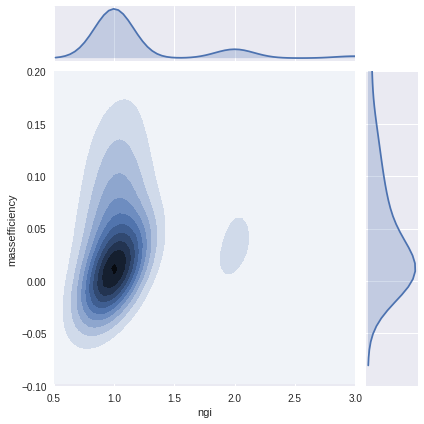

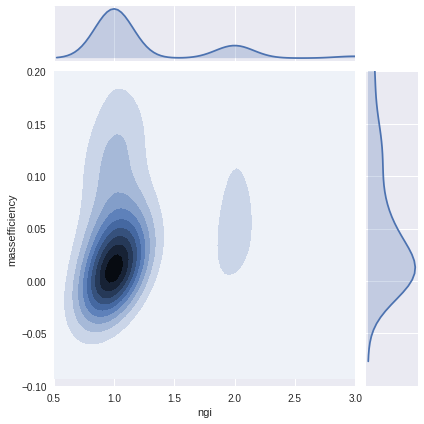

In [13]:
# it appears that systems that create 2 planets have a higher mass efficiency 
# than those that create 1
ax=sns.jointplot(x="ngi", y="massefficiency", data=dng,kind="kde",stat_func=None,xlim=(0.5,3),ylim=(-0.1,0.2))
ax=sns.jointplot(x="ngi", y="massefficiency", data=dlg,kind="kde",stat_func=None,xlim=(0.5,3),ylim=(-0.1,0.2))
ax=sns.jointplot(x="ngi", y="massefficiency", data=dhg,kind="kde",stat_func=None,xlim=(0.5,3),ylim=(-0.1,0.2))

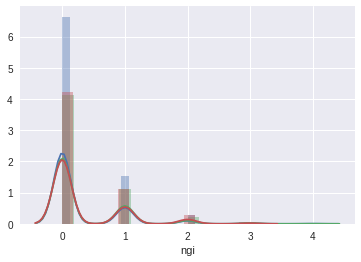

In [29]:
# less giant planets if there are perturbations, but distribution does not change
sns.distplot(dn.ngi)
sns.distplot(dl.ngi)
sns.distplot(dh.ngi)

In [15]:
dnt.head()

,Unnamed: 0,ident,com,nplanets,massbudget,massefficiency,sigmag0,md,rc,ms,metal,taugas,qest,ngi,mtr,apert,gia,logeff
1,1,5.0,2.932894,12.0,17.882769,0.000488,102.431593,0.118280,38.977428,1.075269,-0.150160,1.014449e+06,5.464831,0.0,17.882769,0.0,False,-3.311837
3,3,8.0,5.740174,9.0,8.166382,0.000163,62.737337,0.161499,58.158928,1.076658,-0.282408,6.017040e+06,4.704798,0.0,8.166382,0.0,False,-3.786940
5,5,15.0,8.394027,8.0,16.003091,0.000436,106.824759,0.108460,38.167542,0.986003,0.388613,2.435406e+06,5.218175,0.0,16.003091,0.0,False,-3.360068
6,6,16.0,4.289089,24.0,12.426573,0.000219,118.543720,0.213987,45.042137,1.258747,-0.352459,1.107032e+06,4.469478,0.0,12.426573,0.0,False,-3.658976
7,7,17.0,3.771156,12.0,16.762554,0.000811,35.587738,0.045863,49.645451,0.739731,0.121866,9.050091e+06,7.257983,0.0,16.762554,0.0,False,-3.090930


/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

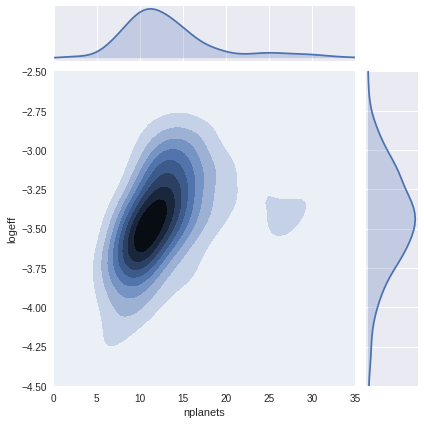

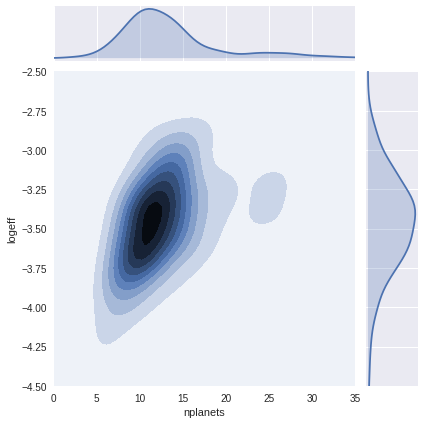

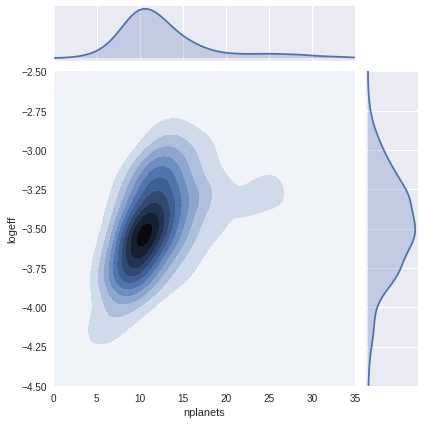

In [14]:
# higher mass efficiency yields more planets for tps
dnt['logeff']=np.log10(dnt.massefficiency)
dlt['logeff']=np.log10(dlt.massefficiency)
dht['logeff']=np.log10(dht.massefficiency)
ax=sns.jointplot(x="nplanets", y="logeff", data=dnt,kind="kde",stat_func=None,xlim=(0,35),ylim=(-4.5,-2.5))
ax=sns.jointplot(x="nplanets", y="logeff", data=dlt,kind="kde",stat_func=None,xlim=(0,35),ylim=(-4.5,-2.5))
ax=sns.jointplot(x="nplanets", y="logeff", data=dht,kind="kde",stat_func=None,xlim=(0,35),ylim=(-4.5,-2.5))

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

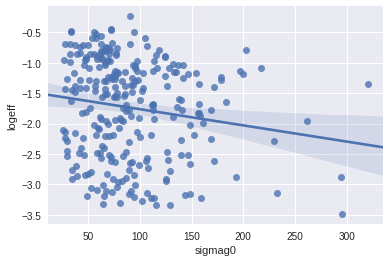

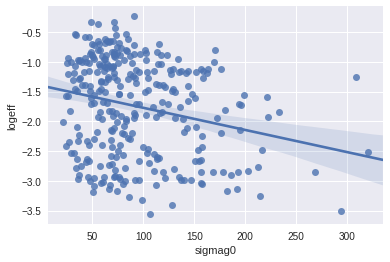

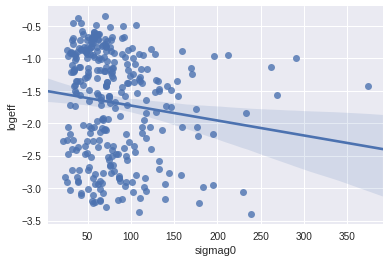

In [35]:
# higher sigmag0, higher mass efficiency for giant planetary systems
dng['logeff']=np.log10(dng.massefficiency)
dlg['logeff']=np.log10(dlg.massefficiency)
dhg['logeff']=np.log10(dhg.massefficiency)
sns.regplot(x="sigmag0", y="logeff", data=dng)
plt.show()
sns.regplot(x="sigmag0", y="logeff", data=dlg)
plt.show()
sns.regplot(x="sigmag0", y="logeff", data=dhg)
plt.show()


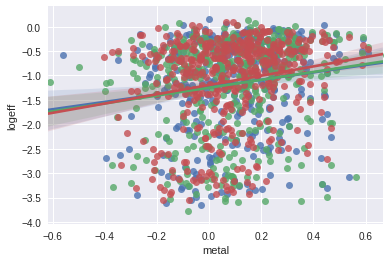

In [53]:
# higher metallicity, higher mass efficiency for gps
sns.regplot(x="metal", y="logeff", data=dnpg)
sns.regplot(x="metal", y="logeff", data=dlpg)
sns.regplot(x="metal", y="logeff", data=dhpg)

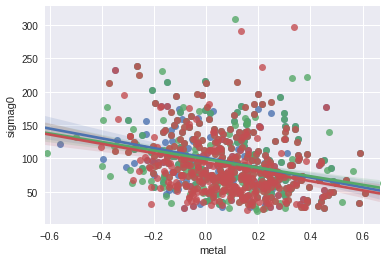

In [58]:
# higher metallicity, lower sigmag0 for gps
sns.regplot(x="metal", y="sigmag0", data=dnpg)
sns.regplot(x="metal", y="sigmag0", data=dlpg)
sns.regplot(x="metal", y="sigmag0", data=dhpg)

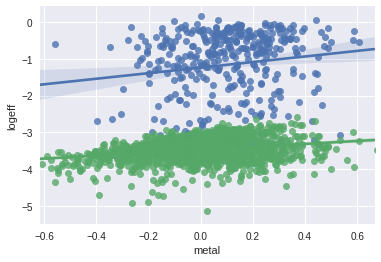

In [59]:
# much higher efficiencies for gps than for tps
sns.regplot(dnpg.metal,dnpg.logeff)
sns.regplot(dnpt.metal,dnpt.logeff)

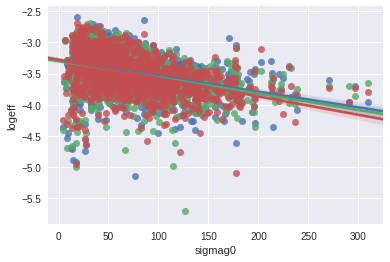

In [52]:
# higher sigmag0, lower mass efficiency for terrestrial planetary systems
# this happens because high density favors gp formation over tp formation
sns.regplot(x="sigmag0", y="logeff", data=dnpt)
sns.regplot(x="sigmag0", y="logeff", data=dlpt)
sns.regplot(x="sigmag0", y="logeff", data=dhpt)

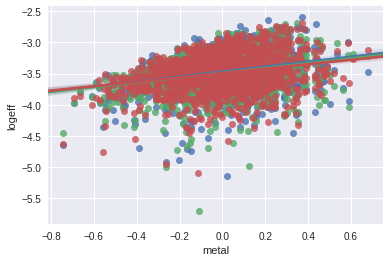

In [57]:
# higher metallicity, higher mass efficiency for tps
sns.regplot(x="metal", y="logeff", data=dnpt)
sns.regplot(x="metal", y="logeff", data=dlpt)
sns.regplot(x="metal", y="logeff", data=dhpt)

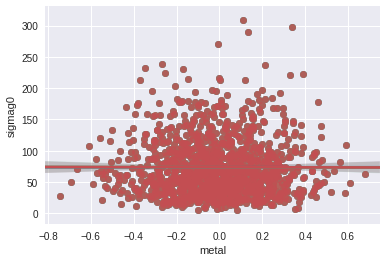

In [60]:
# no correlation between metallicity and sigmag0 for tps
sns.regplot(x="metal", y="sigmag0", data=dnpt)
sns.regplot(x="metal", y="sigmag0", data=dlpt)
sns.regplot(x="metal", y="sigmag0", data=dhpt)

## From here on, no results

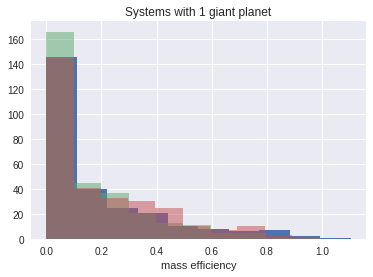

In [6]:
# no effect
filtern=dnpg.nplanets==1
filterl=dlpg.nplanets==1
filterh=dhpg.nplanets==1
plt.hist(dnpg.massefficiency[filtern])
plt.hist(dlpg.massefficiency[filterl],alpha=0.5)
plt.hist(dhpg.massefficiency[filterh],alpha=0.5)
plt.xlabel('mass efficiency')
plt.title('Systems with 1 giant planet')

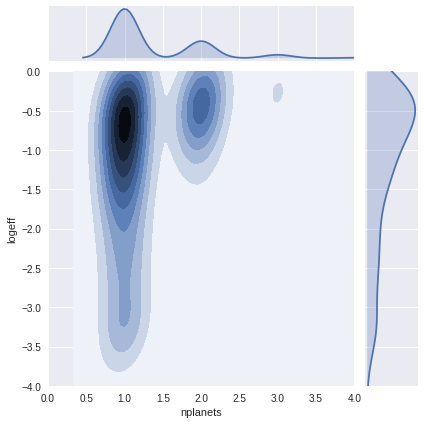

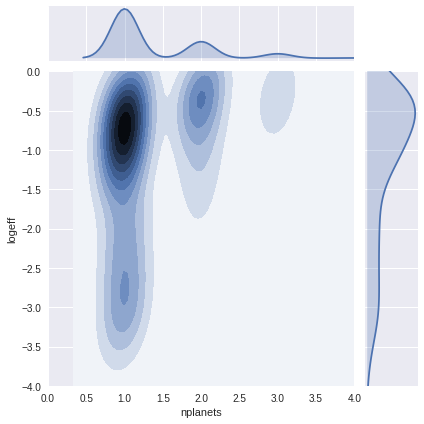

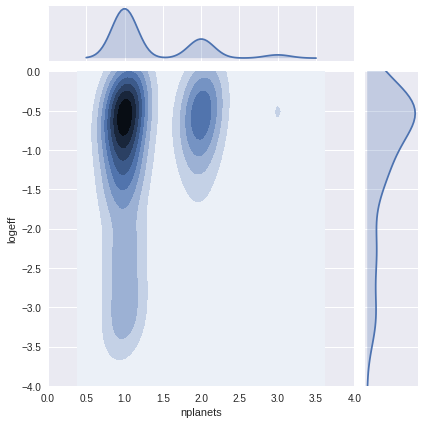

In [7]:
# no effect
dnpg['logeff']=np.log10(dnpg.massefficiency)
dlpg['logeff']=np.log10(dlpg.massefficiency)
dhpg['logeff']=np.log10(dhpg.massefficiency)
ax=sns.jointplot(x="nplanets", y="logeff", data=dnpg,kind="kde",stat_func=None,xlim=(0,4),ylim=(-4,0))
ax=sns.jointplot(x="nplanets", y="logeff", data=dlpg,kind="kde",stat_func=None,xlim=(0,4),ylim=(-4,0))
ax=sns.jointplot(x="nplanets", y="logeff", data=dhpg,kind="kde",stat_func=None,xlim=(0,4),ylim=(-4,0))

In [13]:
from sklearn.neighbors import KernelDensity
from sklearn.grid_search import GridSearchCV

def uni_kde(x,y,tickno=5,nlev=30):
    x_grid=np.around(np.arange(x.min(),x.max(),0.1),2)
    y_grid=np.linspace(y.min(),y.max(),len(x_grid))
    conv=(x.max()-x.min())/(y.max()-y.min())
    yori=y
    y=y*conv
    y_grid=y_grid*conv
    grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(x.min(),x.max()/10,30)},
                    cv=20) # 20-fold cross-validation
    grid.fit(np.vstack([x,y]).T)
    print(grid.best_params_)
    X, Y = np.meshgrid(x_grid, y_grid)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    kde2d = grid.best_estimator_
    pdf2d = np.exp(kde2d.score_samples(xy)).reshape(X.shape)
    plt.figure(figsize=(5,5))
    levels = np.linspace(0, pdf2d.max(), nlev)
    plt.contourf(X, Y, pdf2d, levels=levels, cmap=plt.cm.Reds)
    tickno=5
    old_ticks=np.linspace(y.max(), y.min(), tickno)
    major_ticks = 10**np.linspace(yori.max(), yori.min(), tickno)
    myticks=[]
    for i in major_ticks:
        myticks+=["%.e"%i]
    e=plt.yticks(old_ticks,myticks) 

{'bandwidth': 1.0862068965517242}


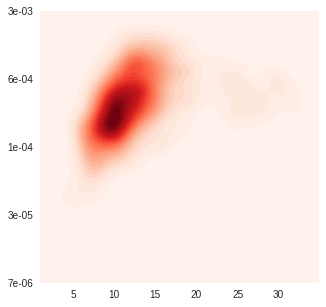

In [14]:
uni_kde(dnpt.nplanets,dnpt.logeff)

{'bandwidth': 1.1793103448275861}


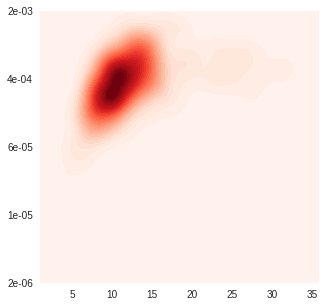

In [15]:
uni_kde(dlpt.nplanets,dlpt.logeff)

{'bandwidth': 2.0}


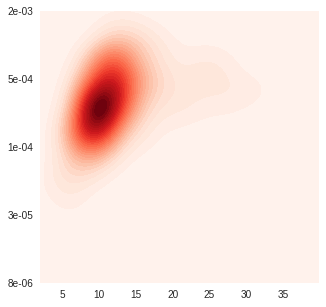

In [16]:
uni_kde(dhpt.nplanets,dhpt.logeff)

In [43]:
common=dnpt.ident[np.in1d(dnpt.ident,dnpg.ident)]

In [44]:
te=dnpt[np.in1d(dnpt.ident,common)]
gi=dnpg[np.in1d(dnpg.ident,common)]

In [45]:
tmb=[]
tnp=[]
for i,j,k,l in zip(gi.massbudget,te.massbudget,gi.nplanets,te.nplanets):
    tmb+=[i+j]
    tnp+=[k+l]
tmb=np.array(tmb)
tnp=np.array(tnp)

In [46]:
dfer=pd.DataFrame({'x' : tnp, 'y': np.log10(tmb)})

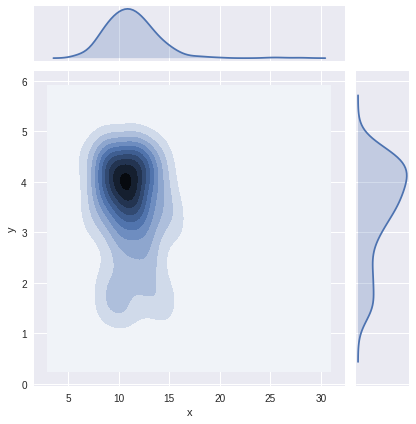

In [47]:
ax=sns.jointplot(x="x", y="y", data=dfer,kind="kde",stat_func=None)